In [3]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import interact

In [12]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [72]:
fontsize_general = 12
plt.rcParams.update({'font.size': fontsize_general,
                     'axes.titlesize': fontsize_general,
                     'axes.labelsize': fontsize_general,
                     'axes.labelpad': 2,
                     'lines.linewidth': 1,
                     'lines.markersize': 4,
                     'xtick.labelsize' : fontsize_general,
                     'ytick.labelsize' : fontsize_general,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in'})

In [43]:
## Define geometry

L = 10.0  # Domain size
Nx = 100  # Number of spatial points
X_res = L / Nx  # Spatial resolution
X = np.linspace(0, L, Nx) # Spatial grid

#### The diffusion coefficient $D_n$ of bacteria cells is given as:
## $ D_n = \frac{v^2}{\alpha} $

## Common Initial conditions

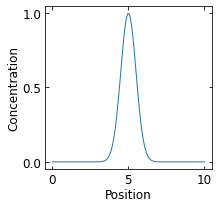

In [90]:
## Initial concentration

G_center = 5
n = np.exp(-((X - G_center)**2) / 0.5)  # Initial cell density (Gaussian)

plt.figure(figsize=(3,3))
plt.plot(X,n)
plt.yticks([0,0.5,1])
plt.xlabel("Position")
plt.ylabel("Concentration")

plt.savefig("initial_concentration.png", dpi=300, bbox_inches='tight', format='png')

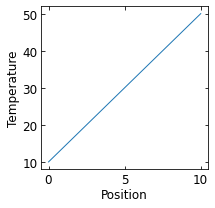

In [91]:
## Temperature profile

Temp = x*4 + 10

plt.figure(figsize=(3,3))
plt.plot(X,Temp)
#plt.yticks([0,0.5,1])
plt.xlabel("Position")
plt.ylabel("Temperature")

plt.savefig("temperature_profile.png", dpi=300, bbox_inches='tight', format='png')

# Case 1 : $\alpha$ and $v$ are independent of x 

## $ \frac{\partial n}{\partial t} = D_{n} \nabla^2 n $ 

#### where 
#### $n$ is the cell density,
#### $D_n$ is the diffusion coefficients of cells

In [121]:
G_center = 5
n = np.exp(-((X - G_center)**2) / 0.5)  # Initial cell density (Gaussian)

alpha = 1*np.ones(len(X))
velocity = 1*np.ones(len(X)) #in um per sec
D_n = (velocity**2)/alpha

#define linear temperature gradient
Temp = x*4 + 10

n_values = [n]
x_values = [X]

def get_probability_evolution(frame):

    ## Define time parameters
    Dt = 0.01  # Time step
    
    n = n_values[-1]
    #print(n)
    
    dn_dx = np.gradient(n, X_res)
    d2n_dx2 = np.gradient(dn_dx, X_res)

        # Update cell density (n)
    n = n + Dt * (D_n * d2n_dx2)

    # Apply boundary conditions (e.g., zero flux)
    n[0], n[-1] = n[1], n[-2]

    n_values.append(n)
    x_values.append(X)
    
    #dynamically rescale the x and y limits
    ax.set_xlim(0, max(x_values[-1]))  
    ax.set_ylim(0, max(n_values[-1]) + 0.1) 

    line.set_data(x_values[-1], n_values[-1])
    return line,

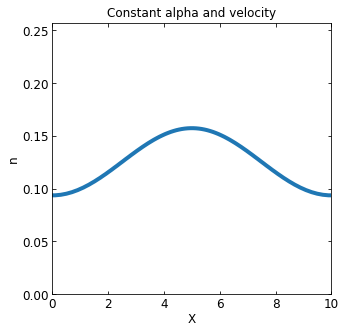

In [122]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5,5))
line, = ax.plot([], [], lw=4)

# Static labels
ax.set_title('Constant alpha and velocity') 
ax.set_xlabel('X')               
ax.set_ylabel('n') 

# Initialization function
def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(-0.1, 1.1)
    line.set_data([], [])
    return line,

# Create animation
anim = FuncAnimation(fig, get_probability_evolution, frames=500, init_func=init, blit=True)

# Show the animation
#plt.show()

# converting to an html5 video
video = anim.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)

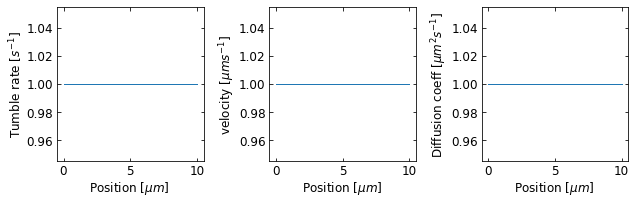

In [101]:
fig, axs = plt.subplots(1,3,figsize=(9,3))

axs[0].plot(x, alpha, label="Tumble rate")
axs[0].set_ylabel("Tumble rate [$s^{-1}$] ")
axs[0].set_xlabel("Position [$\mu m$] ")

axs[1].plot(x, velocity, label="Velocity")
axs[1].set_ylabel("velocity [$\mu m s^{-1}$]")
axs[1].set_xlabel("Position [$\mu m$] ")

axs[2].plot(x, D_n, label="Diffusion coefficient")
axs[2].set_ylabel("Diffusion coeff [$\mu m ^2 s^{-1}$]")
axs[2].set_xlabel("Position [$\mu m$] ")

plt.tight_layout()

plt.savefig("Case_1_parameters.png", dpi=300, bbox_inches='tight', format='png')

# Case 2 : $\alpha$ is $\alpha (x)$ and $v$ is constant

## $ \frac{\partial n}{\partial t} = D_{n} \nabla^2 n $ 

In [102]:
G_center = 5
n = np.exp(-((X - G_center)**2) / 0.5)  # Initial cell density (Gaussian)

alpha = (18 + x*-1)
alpha = alpha/max(alpha)
velocity = 1*np.ones(len(x)) #in um per sec
D_n = (velocity**2)/alpha

#define linear temperature gradient
Temp = x*4 + 10

n_values = [n]
x_values = [X]

def get_probability_evolution(frame):

    ## Define time parameters
    Dt = 0.01  # Time step
    
    n = n_values[-1]
    #print(n)
    
    dn_dx = np.gradient(n, X_res)
    d2n_dx2 = np.gradient(dn_dx, X_res)
    dT_dx = np.gradient(Temp,X_res)

        # Update cell density (n)
    n = n + Dt * (D_n * d2n_dx2)

    # Apply boundary conditions (e.g., zero flux)
    n[0], n[-1] = n[1], n[-2]

    n_values.append(n)
    x_values.append(X)

    #dynamically rescale the x and y limits
    ax.set_xlim(0, max(x_values[-1]))  
    ax.set_ylim(0, max(n_values[-1]) + 0.1) 
    
    line.set_data(x_values[-1], n_values[-1])
    return line,

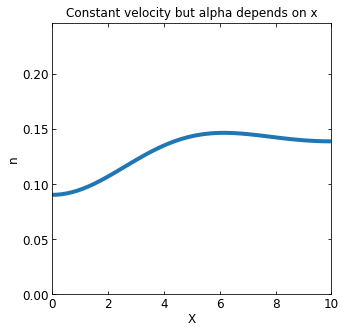

In [103]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5,5))
line, = ax.plot([], [], lw=4)

# Static labels
ax.set_title('Constant velocity but alpha depends on x') 
ax.set_xlabel('X')               
ax.set_ylabel('n') 

# Initialization function
def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(-0.1, 1.1)
    line.set_data([], [])
    return line,

# Create animation
anim = FuncAnimation(fig, get_probability_evolution, frames=500, init_func=init, blit=True)

# Show the animation
#plt.show()

# converting to an html5 video
video = anim.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)

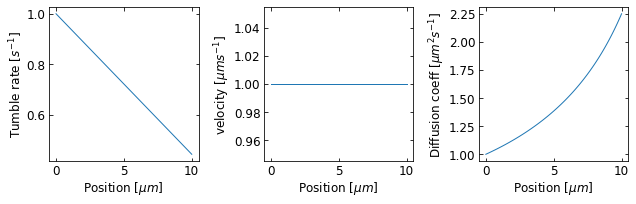

In [104]:
fig, axs = plt.subplots(1,3,figsize=(9,3))

axs[0].plot(x, alpha, label="Tumble rate")
axs[0].set_ylabel("Tumble rate [$s^{-1}$] ")
axs[0].set_xlabel("Position [$\mu m$] ")

axs[1].plot(x, velocity, label="Velocity")
axs[1].set_ylabel("velocity [$\mu m s^{-1}$]")
axs[1].set_xlabel("Position [$\mu m$] ")

axs[2].plot(x, D_n, label="Diffusion coefficient")
axs[2].set_ylabel("Diffusion coeff [$\mu m ^2 s^{-1}$]")
axs[2].set_xlabel("Position [$\mu m$] ")

plt.tight_layout()

plt.savefig("Case_2_parameters.png", dpi=300, bbox_inches='tight', format='png')

# Case 3 : $\alpha$ is $\alpha (x)$ and $v$ is $v (x)$, but $\frac{v(x)}{\alpha(x)}$ is constant 

## $ \frac{\partial n}{\partial t} = \nabla^2 (D_{n} n) $ 

In [105]:
G_center = 5
n = np.exp(-((X - G_center)**2) / 0.5)  # Initial cell density (Gaussian)

alpha = (18 + x*-1)
alpha = alpha/max(alpha)
velocity = (Temp/max(Temp))*1 #in um per sec
D_n = (velocity**2)/alpha

#define linear temperature gradient
Temp = x*4 + 10

n_values = [n]
x_values = [X]

def get_probability_evolution(frame):

    ## Define time parameters
    Dt = 0.01  # Time step
    
    n = n_values[-1]
    #print(n)
    
    dn_dx = np.gradient(n*D_n, X_res)
    d2n_dx2 = np.gradient(dn_dx, X_res)
    dT_dx = np.gradient(Temp,X_res)

        # Update cell density (n)
    n = n + Dt * (d2n_dx2)

    # Apply boundary conditions (e.g., zero flux)
    n[0], n[-1] = n[1], n[-2]

    n_values.append(n)
    x_values.append(X)

    #dynamically rescale the x and y limits
    ax.set_xlim(0, max(x_values[-1]))  
    ax.set_ylim(0, max(n_values[-1]) + 0.1) 
    
    line.set_data(x_values[-1], n_values[-1])
    return line,

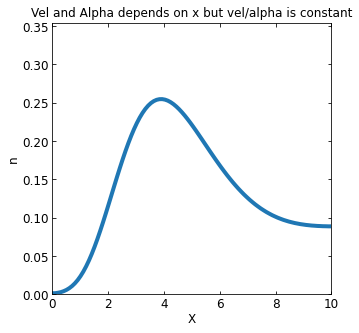

In [106]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5,5))
line, = ax.plot([], [], lw=4)

# Static labels
ax.set_title('Vel and Alpha depends on x but vel/alpha is constant') 
ax.set_xlabel('X')               
ax.set_ylabel('n') 

# Initialization function
def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(-0.1, 1.1)
    line.set_data([], [])
    return line,

# Create animation
anim = FuncAnimation(fig, get_probability_evolution, frames=500, init_func=init, blit=True)

# Show the animation
#plt.show()

# converting to an html5 video
video = anim.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)

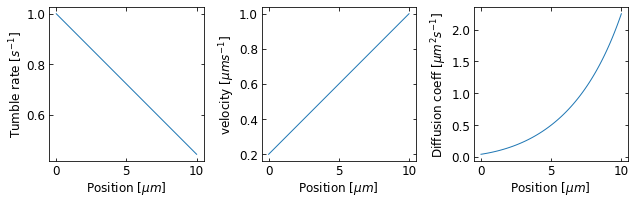

In [107]:
fig, axs = plt.subplots(1,3,figsize=(9,3))

axs[0].plot(x, alpha, label="Tumble rate")
axs[0].set_ylabel("Tumble rate [$s^{-1}$] ")
axs[0].set_xlabel("Position [$\mu m$] ")

axs[1].plot(x, velocity, label="Velocity")
axs[1].set_ylabel("velocity [$\mu m s^{-1}$]")
axs[1].set_xlabel("Position [$\mu m$] ")

axs[2].plot(x, D_n, label="Diffusion coefficient")
axs[2].set_ylabel("Diffusion coeff [$\mu m ^2 s^{-1}$]")
axs[2].set_xlabel("Position [$\mu m$] ")

plt.tight_layout()

plt.savefig("Case_3_parameters.png", dpi=300, bbox_inches='tight', format='png')

# Case 4 : $\alpha$ is $\alpha$ and $v$ is $v (x)$
## $ \frac{\partial n}{\partial t} = \nabla[ D_{n} \nabla (n) + 0.5 n \nabla D_{n} ] $ 

In [117]:
G_center = 5
n = np.exp(-((X - G_center)**2) / 0.5)  # Initial cell density (Gaussian)

alpha = (18 + x*-1)
alpha = 1*np.ones(len(x))
velocity = (Temp/max(Temp))*1
D_n = (velocity**2)/alpha

#define linear temperature gradient
Temp = x*4 + 10

n_values = [n]
x_values = [X]

def get_probability_evolution(frame):

    ## Define time parameters
    Dt = 0.01  # Time step
    
    n = n_values[-1]
    #print(n)
    
    dn_dx = np.gradient(n, X_res)
    dD_dx = np.gradient(D_n, X_res)
    F = (D_n*dn_dx) + (0.5*n*dD_dx) #-1*Flux (the term in the bracket)
    d2n_dx2 = np.gradient(F, X_res)

        # Update cell density (n)
    n = n + Dt*(d2n_dx2)

    # Apply boundary conditions (e.g., zero flux)
    n[0], n[-1] = n[1], n[-2]

    n_values.append(n)
    x_values.append(X)

    #dynamically rescale the x and y limits
    ax.set_xlim(0, max(x_values[-1]))  
    ax.set_ylim(0, max(n_values[-1]) + 0.1) 
    
    line.set_data(x_values[-1], n_values[-1])
    return line,

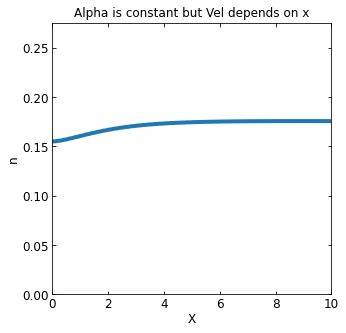

In [118]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5,5))
line, = ax.plot([], [], lw=4)

# Static labels
ax.set_title('Alpha is constant but Vel depends on x') 
ax.set_xlabel('X')               
ax.set_ylabel('n') 

# Initialization function
def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(-0.1, 1.1)
    line.set_data([], [])
    return line,

# Create animation
anim = FuncAnimation(fig, get_probability_evolution, frames=5000, init_func=init, blit=True)

# Show the animation
#plt.show()

# converting to an html5 video
video = anim.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(9,3))

axs[0].plot(x, alpha, label="Tumble rate")
axs[0].set_ylabel("Tumble rate [$s^{-1}$] ")
axs[0].set_xlabel("Position [$\mu m$] ")

axs[1].plot(x, velocity, label="Velocity")
axs[1].set_ylabel("velocity [$\mu m s^{-1}$]")
axs[1].set_xlabel("Position [$\mu m$] ")

axs[2].plot(x, D_n, label="Diffusion coefficient")
axs[2].set_ylabel("Diffusion coeff [$\mu m ^2 s^{-1}$]")
axs[2].set_xlabel("Position [$\mu m$] ")

plt.tight_layout()

plt.savefig("Case_4_parameters.png", dpi=300, bbox_inches='tight', format='png')